# UVOD

Potrošnja električne energije jedan je od najvažnijih pokazatelja suvremenog društva jer izravno odražava gospodarsku aktivnost, razinu industrijalizacije, tehnološki razvoj i životni standard stanovništva. Električna energija danas je temelj funkcioniranja gotovo svih sektora – od industrije i prometa do kućanstava i digitalnih usluga. Zbog toga analiza potrošnje električne energije predstavlja vrijedan alat za razumijevanje ekonomskih trendova, energetskih politika i smjera razvoja pojedinih država.

Europska unija, kao jedno od najvećih svjetskih gospodarskih i političkih područja, suočava se s velikim izazovima u području energetike, uključujući energetsku sigurnost, tranziciju prema obnovljivim izvorima i smanjenje emisija stakleničkih plinova. Praćenjem potrošnje električne energije po državama članicama moguće je uočiti razlike u razini razvoja, strukturi gospodarstva i učinkovitosti korištenja energije. Također, promatranjem agregiranih podataka moguće je dobiti uvid u ukupno opterećenje energetskog sustava Europske unije.

Ovaj projekt usmjeren je na izgradnju sustava za prikupljanje, obradu, integraciju i analizu otvorenih podataka Eurostata kako bi se omogućila jasna i strukturirana analiza potrošnje električne energije među državama EU kroz više godina.

# MOTIVACIJA

Za temu ovog projekta odlučio sam se jer me zanimalo kako se potrošnja električne energije razlikuje među državama Europske unije te kako se ona mijenjala kroz vrijeme. Električna energija nije samo tehnički resurs, već i izravan pokazatelj životnog standarda, industrijske aktivnosti i digitalizacije društva. Posebno me zanimalo postoje li značajne razlike između pojedinih država te kako izgleda kolektivna potrošnja Europske unije u cjelini.

Motivaciju je dodatno pojačala dostupnost otvorenih, pouzdanih i standardiziranih podataka koje pruža Eurostat. Korištenjem stvarnih statističkih podataka moguće je provesti realnu analizu i izgraditi sustav koji ima stvarnu primjenu u energetskim, ekonomskim i istraživačkim kontekstima. Cilj mi je bio ne samo analizirati podatke, već i izgraditi cjeloviti podatkovni sustav koji uključuje bazu podataka i REST sučelje za pristup informacijama.

Cilj ovog istraživanja je analizirati potrošnju električne energije u državama Europske unije kroz više godina, integrirati podatke iz više izvora te omogućiti pristup tim podacima putem aplikacijskog sučelja.

# OPIS IZVORA PODATAKA I PRIKUPLJANJE

Podaci korišteni u ovom projektu preuzeti su s Eurostat Open Data portala, službenog izvora statističkih podataka Europske unije.

Prvi skup podataka odnosi se na energiju i preuzet je u CSV formatu. Ovaj dataset sadrži godišnje podatke o energetskim pokazateljima po državama, uključujući energetske bilance, vrste energenata prema SIEC klasifikaciji te mjerne jedinice. Iz tog skupa korišteni su podaci koji se odnose na električnu energiju.

Drugi skup podataka odnosi se na stanovništvo i preuzet je s Eurostata te pretvoren u JSON format. Ovaj dataset sadrži podatke o broju stanovnika po državama i godinama. Time je ostvarena integracija heterogenih izvora podataka, budući da se u projektu koristi i CSV i JSON format.

Podaci su spremljeni u isti direktorij kao i Jupyter Notebook te se učitavaju pomoću pandas biblioteke.

Izvori:
Eurostat Open Data Portal – Energy database
Eurostat Open Data Portal – Population database

# Početak koda

In [68]:
import pandas as pd

population = pd.read_json("eurostat_population.json")
energy_raw = pd.read_csv("eurostat_energy.csv")



In [69]:
population = population.dropna()

# tipovi podataka
population["year"] = population["year"].astype(int)
population["population"] = population["population"].astype(float)

population.head()

,country,year,population
0,AD,2016,71732.0
1,AD,2018,74794.0
2,AD,2019,76177.0
3,AD,2020,77543.0
4,AD,2022,79535.0


In [70]:
energy = energy_raw[[
    "geo",
    "TIME_PERIOD",
    "OBS_VALUE",
    "nrg_bal",
    "siec",
    "unit"
]].copy()

energy = energy[
    (energy["unit"] == "KTOE") &
    (energy["nrg_bal"] == "NRGSUP")
]

energy = energy.rename(columns={
    "geo": "country",
    "TIME_PERIOD": "year",
    "OBS_VALUE": "consumption"
})

energy = energy.dropna()

energy["year"] = energy["year"].astype(int)
energy["consumption"] = energy["consumption"].astype(float)

energy.head()

,country,year,consumption,nrg_bal,siec,unit
0,AL,2013,67.005,NRGSUP,C0000X0350-0370,KTOE
1,AL,2014,86.449,NRGSUP,C0000X0350-0370,KTOE
2,AL,2015,94.089,NRGSUP,C0000X0350-0370,KTOE
3,AL,2016,49.941,NRGSUP,C0000X0350-0370,KTOE
4,AL,2017,123.149,NRGSUP,C0000X0350-0370,KTOE


# PRETPROCESIRANJE I ČIŠĆENJE
Prikupljeni podaci iz oba izvora zahtijevali su pretprocesiranje prije integracije. U oba skupa uklonjeni su redci s nedostajućim vrijednostima te su standardizirani nazivi stupaca kako bi se omogućilo jednostavno spajanje podataka.

Kod energetskih podataka provedeno je filtriranje kako bi se izdvojili samo zapisi koji se odnose na električnu energiju, koristeći SIEC oznaku. Također su uklonjene nepotrebne kolone, a podaci su svedeni na osnovne atribute: država, godina i vrijednost potrošnje.

Kod populacijskih podataka zadržani su samo stupci koji sadrže oznaku države, godinu i broj stanovnika. Svi podaci su pretvoreni u odgovarajuće tipove (godina u integer, vrijednosti u float).

Ovaj korak osigurao je da su oba skupa podataka čista, konzistentna i spremna za integraciju.

In [71]:
# očekivani stupci: country, year, consumption
# u population: country, year, population

merged = pd.merge(
    energy,
    population,
    on=["country", "year"],
    how="inner"
)

merged.head()


,country,year,consumption,nrg_bal,siec,unit,population
0,AL,2014,86.449,NRGSUP,C0000X0350-0370,KTOE,2892394.0
1,AL,2015,94.089,NRGSUP,C0000X0350-0370,KTOE,2885796.0
2,AL,2016,49.941,NRGSUP,C0000X0350-0370,KTOE,2875592.0
3,AL,2017,123.149,NRGSUP,C0000X0350-0370,KTOE,2876591.0
4,AL,2018,239.094,NRGSUP,C0000X0350-0370,KTOE,2870324.0


# INTEGRACIJA PODATAKA

Integracija podataka

Integracija podataka provedena je spajanjem energetskih i demografskih podataka prema zajedničkim atributima države i godine. Za spajanje je korištena funkcija merge iz pandas biblioteke.

Rezultat integracije je objedinjeni skup podataka koji sadrži informacije o potrošnji električne energije i broju stanovnika po državama i godinama. Time je omogućena daljnja analiza, uključujući praćenje trendova, usporedbu država i potencijalne izračune izvedenih pokazatelja poput potrošnje po stanovniku.

Integrirani dataset predstavlja središnji podatkovni sloj cijelog sustava.

Integracijom energetskih i demografskih podataka otvorena je mogućnost izračuna izvedenih pokazatelja. Osim analize ukupne potrošnje električne energije, izračunata je i potrošnja po stanovniku dijeljenjem ukupne potrošnje s brojem stanovnika za svaku državu i godinu. Time je omogućena realnija usporedba među državama jer se uklanja utjecaj veličine populacije i dobiva uvid u prosječnu razinu potrošnje električne energije po osobi.

In [72]:
import sqlite3

conn = sqlite3.connect("eu_energy.db")
merged.to_sql("energy_consumption", conn, if_exists="replace", index=False)
conn.close()


# POHRANA U BAZU PODATAKA

Nakon integracije podataka, objedinjeni skup spremljen je u SQLite bazu podataka. Baza se nalazi u istoj mapi projekta i sadrži tablicu u kojoj su pohranjeni svi integrirani zapisi.

Za rad s bazom korištena je sqlite3 biblioteka, a podaci su spremljeni pomoću pandas funkcije to_sql. Time je omogućeno trajno spremanje podataka te njihovo kasnije dohvaćanje putem SQL upita i REST API-ja.


In [73]:
# prosječna potrošnja po državama
avg_consumption = merged.groupby("country")["consumption"].mean().sort_values(ascending=False)
avg_consumption.head()


country
EU27_2020    228914.524409
DE            48156.658030
FR            39644.706220
UK            29253.954361
IT            24564.162924
Name: consumption, dtype: float64

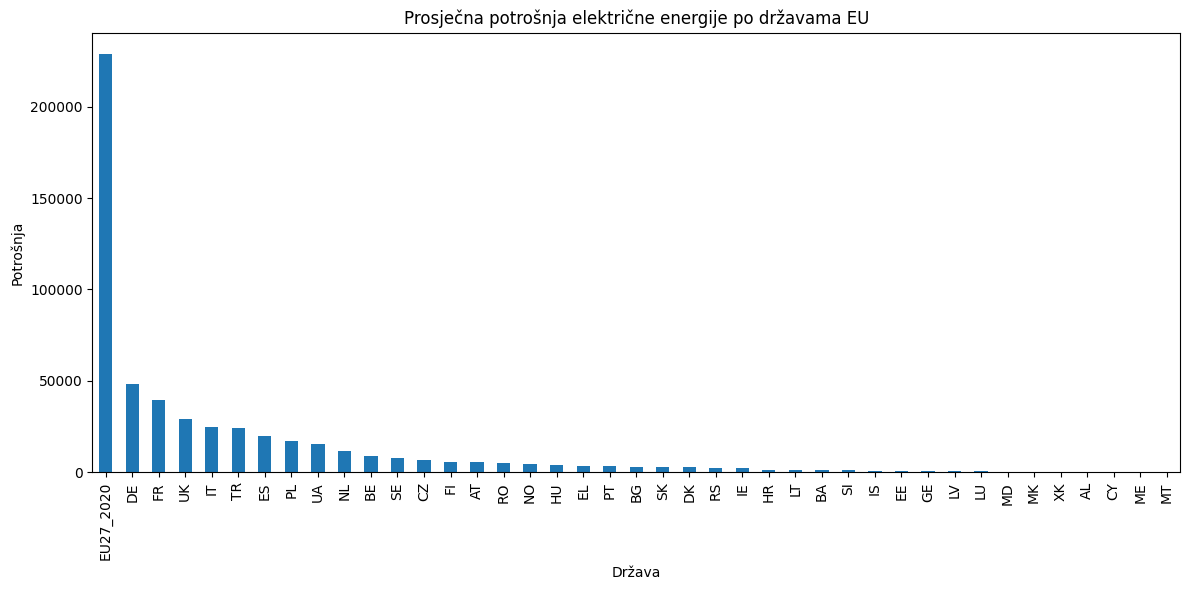

['country', 'year', 'consumption', 'nrg_bal', 'siec', 'unit']


In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
avg_consumption.plot(kind="bar")
plt.title("Prosječna potrošnja električne energije po državama EU")
plt.xlabel("Država")
plt.ylabel("Potrošnja")
plt.tight_layout()
plt.show()
print(energy.columns.tolist())

In [75]:
de = energy[
    (energy["country"] == "DE") &
    (energy["siec"] == "E7000")
].copy()

de = de.dropna(subset=["year", "consumption"])
de["year"] = de["year"].astype(int)
de["consumption"] = de["consumption"].astype(float)

de_yearly = de.groupby("year", as_index=False)["consumption"].sum()
de_yearly

,year,consumption
0,2013,-2768.100
1,2014,-2913.586
2,2015,-4151.505
3,2016,-4344.368
4,2017,-4510.662
5,2018,-4190.542
6,2019,-2808.856
7,2020,-1636.199
8,2021,-1597.163
9,2022,-2343.594


# Kreiranje i prikaz rada aplikacije te vizualizacija podataka
Nad SQLite bazom razvijen je REST API korištenjem Flask okvira. Aplikacija omogućuje dohvat svih podataka, dohvat podataka po državama te dohvat podataka za određenu državu i godinu. Time je omogućena komunikacija s bazom putem standardnih HTTP zahtjeva.

Nakon pokretanja API-ja, podaci se dohvaćaju iz baze i dodatno analiziraju u Python okruženju. Za manipulaciju podacima korišten je pandas, dok su vizualizacije izrađene pomoću matplotlib biblioteke.

Izrađeni su grafovi koji prikazuju prosječnu potrošnju električne energije po državama te linijski grafovi koji prikazuju trendove potrošnje kroz godine. Vizualizacije omogućuju jasnu usporedbu među državama i praćenje promjena potrošnje kroz vrijeme. Posebno je omogućeno promatranje i pojedinačnih država i kolektivne potrošnje Europske unije. Uz grafove ukupne potrošnje, izrađene su i vizualizacije potrošnje električne energije po stanovniku. Stupčasti grafovi korišteni su za usporedbu država prema prosječnoj potrošnji po osobi, dok su linijski grafovi korišteni za praćenje promjena tog pokazatelja kroz vrijeme. Ovi prikazi omogućuju jasnije razumijevanje stvarne razine energetske potrošnje neovisno o veličini države.

Prikaz rada aplikacije ostvaren je dohvatom podataka putem REST API-ja u pregledniku te prikazom rezultata analize i grafova u Jupyter Notebooku.

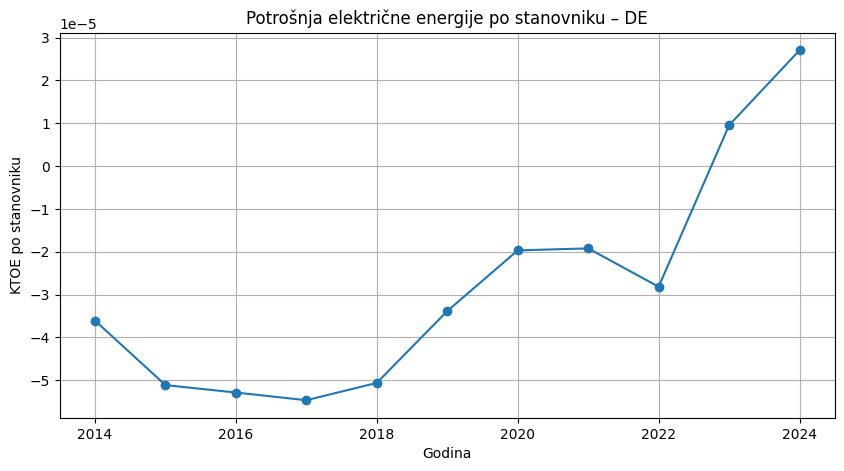

In [76]:
import matplotlib.pyplot as plt

merged["consumption_per_capita"] = merged["consumption"] / merged["population"]

country = "DE"

subset = merged[(merged["country"] == country) & (merged["siec"] == "E7000")]
subset = subset.sort_values("year")

plt.figure(figsize=(10,5))
plt.plot(subset["year"], subset["consumption_per_capita"], marker="o")
plt.title(f"Potrošnja električne energije po stanovniku – {country}")
plt.xlabel("Godina")
plt.ylabel("KTOE po stanovniku")
plt.grid(True)
plt.show()



# Kritički osvrt

Praktična izvedivost ovog sustava je visoka jer koristi otvorene podatke, jednostavnu relacijsku bazu i lagani web okvir. Sustav je pogodan kao temelj za energetske analitičke alate i može se relativno lako proširivati. Prednost rješenja je jasna struktura cjevovoda podataka: izvor → obrada → baza → API → analiza.

Ograničenja sustava očituju se u statičkoj prirodi podataka te u osnovnoj razini analize. Sustav se oslanja na ručno preuzimanje podataka i ne uključuje napredne metode predikcije ili automatizirane nadogradnje. Također, SQLite baza je prikladna za manje projekte, ali bi u stvarnoj primjeni zahtijevala zamjenu robusnijim sustavom.Uvođenjem pokazatelja potrošnje po stanovniku sustav dobiva veću analitičku vrijednost jer omogućuje pravedniju usporedbu među državama. Time se smanjuje utjecaj ukupne populacije i naglasak se stavlja na individualne obrasce potrošnje. Ovakav pristup je osobito primjenjiv u energetskim i ekonomskim analizama te daje realniju osnovu za donošenje zaključaka.


# Zaključak

U ovom projektu izgradio sam cjelovit sustav za analizu potrošnje električne energije u Europskoj uniji. Projekt obuhvaća prikupljanje podataka, njihovo čišćenje i integraciju, pohranu u bazu podataka, izradu REST sučelja te analizu i vizualizaciju rezultata.

Analiza je pokazala kako se otvoreni statistički podaci mogu učinkovito pretvoriti u funkcionalan informacijski sustav. Implementirani sustav predstavlja kvalitetnu osnovu za daljnji razvoj naprednijih energetskih analitičkih rješenja.

# Literatura

Eurostat Open Data Portal
https://ec.europa.eu/eurostat

Eurostat – Energy Database
https://ec.europa.eu/eurostat/web/energy/database

Eurostat – Population Database
https://ec.europa.eu/eurostat/web/population-demography

W. McKinney, Data Structures for Statistical Computing in Python, 2010.

M. Grinberg, Flask Web Development, O’Reilly Media, 2018.